In [44]:
import cv2
from PIL import Image
import random
import os, glob
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def divide_image(image):
    sub_blocks = []
    sub_block_height = 40
    sub_block_width = 40
    
    s_p = [0, 44, 88]
    
    for s_i in s_p:
        for s_j in s_p:
            start_x = s_j
            start_y = s_i
            end_x = start_x + sub_block_width
            end_y = start_y + sub_block_height
            sub_block = image[start_y:end_y, start_x:end_x, :]
            sub_blocks.append(sub_block)
    return sub_blocks

In [26]:
data = []
labels = []
div_data = []

height = 128
width = 128
channels = 3
num_classes = 3

path = f'Linnaeus 5 128X128/train/'
Class = os.listdir(path)
print(Class)
for i, a in enumerate(Class):
    data_path = f'Linnaeus 5 128X128/train/{a}/'
    data_list = os.listdir(data_path)
    for d in data_list:
        image = cv2.imread(data_path + d)
        image_from_array = Image.fromarray(image, 'RGB')
        img_arr = np.array(image_from_array)
        div_data.append(divide_image(image=img_arr))
        data.append(img_arr)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)

['dog', 'bird', 'flower']


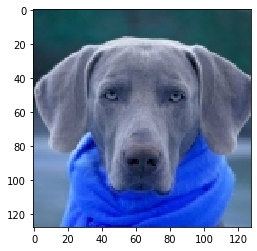

In [62]:
plt.imshow(data[0])

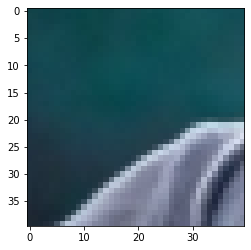

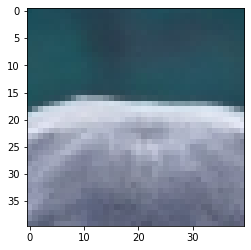

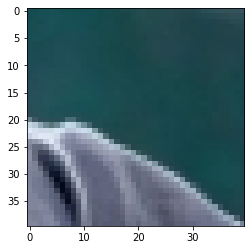

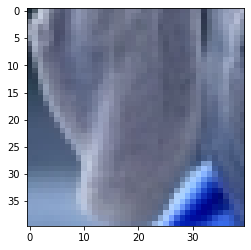

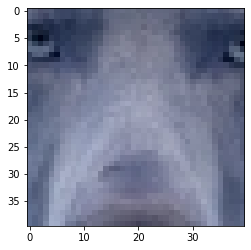

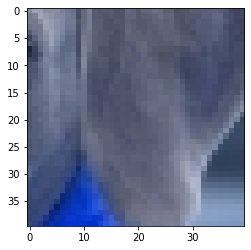

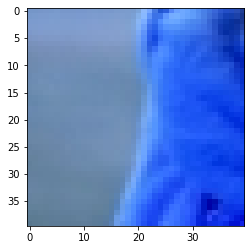

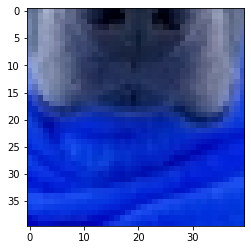

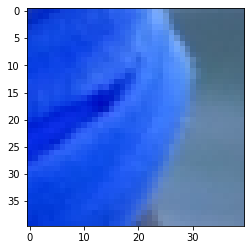

In [61]:
for im in np.array(div_data[0]):
    plt.figure()
    plt.imshow(im)


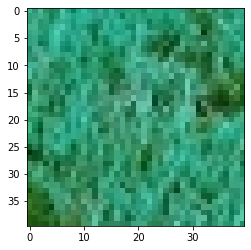

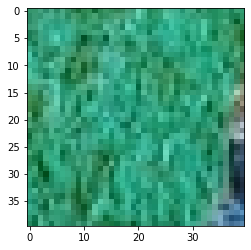

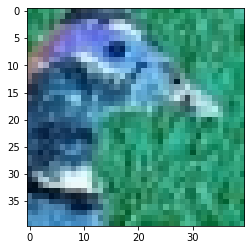

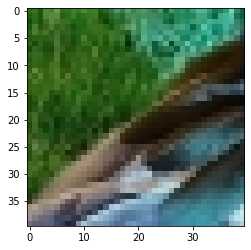

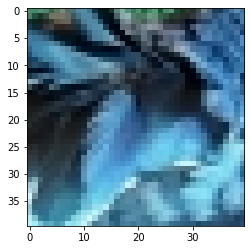

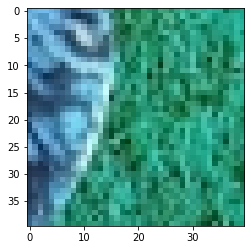

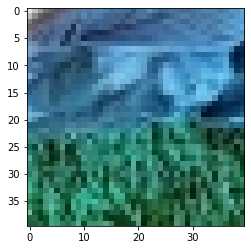

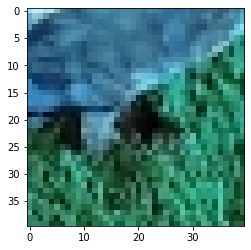

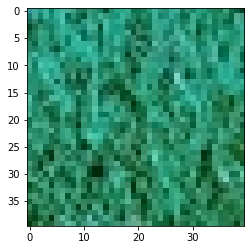

In [125]:
for im in np.array(div_data[1200]):
    plt.figure()
    plt.imshow(im)


In [244]:
def reconstruct_image(combined_blocks):
    rows = []
    for i in range(0, 18, 3):
        row = np.concatenate(combined_blocks[i:i+3], axis=0)
        rows.append(row)

    merged_image = np.concatenate(rows, axis=1)

    return merged_image

def shuffle_blocks(blocks_a, blocks_b):
    shf_blocks = []
    for b_a, b_b in zip(blocks_a, blocks_b):
        random.shuffle(b_a)
        random.shuffle(b_b)
    
        mixed_sub_block = b_a + b_b
        random.shuffle(mixed_sub_block)
        shf_blocks.append(reconstruct_image(mixed_sub_block))
    return shf_blocks

In [245]:
train_n = 1200
label_idx = [0, 1200, 2400]
shf_labels = []
shf_datas = []
for i, l_i in enumerate(label_idx):
    class1 = div_data[l_i : l_i+train_n]
    
    for j, l_i2 in enumerate(label_idx[i+1:]):
        if l_i == l_i2:
            continue
        class2 = div_data[l_i2: l_i2+train_n]
        
        labels_list = [[l_i//train_n, l_i2//train_n]]* train_n
        shf_labels.append(labels_list)
        shf_datas.append(shuffle_blocks(class1, class2))

In [246]:
np.array(shf_datas).shape

(3, 1200, 120, 240, 3)

In [248]:
shf_arr = np.array(shf_datas).reshape(-1,120, 240,3)

shf_arr.shape

(3600, 120, 240, 3)

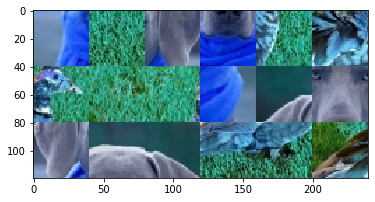

In [249]:
plt.imshow(shf_arr[0])

In [105]:

shf_labels = np.array(shf_labels).reshape(-1,2)

(3600, 2)